# K-Means Clustering:

This Jupyter Notebook is dedicated to understanding and implementing the k-means clustering for soccer data. You can find the dataset [2022-2023 Soccer Player Stats Dataset](https://www.kaggle.com/datasets/vivovinco/20222023-football-player-stats?resource=download).

The following packages are required to run the attached code:

- [Pandas](https://pandas.pydata.org/docs/)

- [Matplotlib.pylab](https://matplotlib.org/2.0.2/api/pyplot_api.html)

- [Numpy](https://numpy.org/doc/)

- [Seaborn](https://seaborn.pydata.org/)

- [SciKit Learn](https://scikit-learn.org/stable/)

## Desciption of the Algorithm:

***
**K-Means Clustering:**
- K-means clustering is an unsupervised machine learning algorithm used to partition a dataset into a predetermined number of clusters. The algorithm aims to group similar data points together while keeping dissimilar points in different clusters.

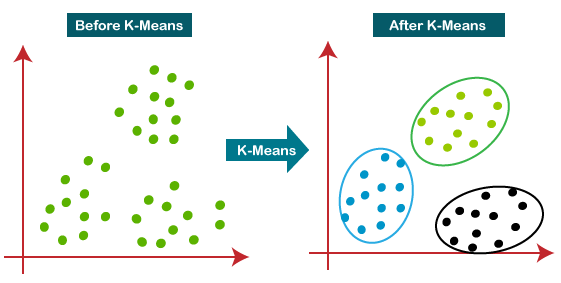

As you can see, the k-means clustering algorithm partitions the dat points into groups, allowing us to place data points that are alike together.

- The goal of k-means clustering is to minimize the sum of squared distances between data points and their corresponding cluster.

- **The Algorithm:**
 - Initialization: Randomly initialize k cluster centroids (points in the feature space).
 - Assignment: Assign each data point to the nearest cluster centroid based on a distance metric (commonly Euclidean distance).
 - Update: Update the cluster centroids by computing the mean of all data points assigned to each cluster.
 - Repeat: Iteratively reassign data points to the nearest centroids and update centroids until convergence (when centroids no longer change significantly).

- K-means clustering is widely used in various domains, including customer segmentation, image compression, anomaly detection, and document clustering.

Image source: [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/).
***

## Supervised vs. Unsupervised Learning:

***
**Supervised Learning:**
-  Supervised learning is a type of machine learning where the model learns from labeled data, meaning each training example consists of input features and their corresponding labels or outcomes.
- The goal of supervised learning is to learn a mapping from input features to output labels, so that the model can make accurate predictions on new, unseen data.
- Supervised is all we've done so far. It includes, neural networks, logistic regression, linear regression, k-nearest, ensemble learning, and more!

**Unsupervised Learning:**
- Unsupervised learning is a type of machine learning where the model learns from unlabeled data, meaning there are no predefined labels or outcomes associated with the input features.
- The goal of unsupervised learning is to find patterns, structures, or relationships within the data without explicit guidance or supervision.
- Common examples of unsupervised learning tasks include clustering (grouping similar data points together), dimensionality reduction (reducing the number of input features while preserving important information), and anomaly detection (identifying unusual patterns or outliers).

Here is an example image that demonstrates the difference between supervised and unsupervised learning for classification.

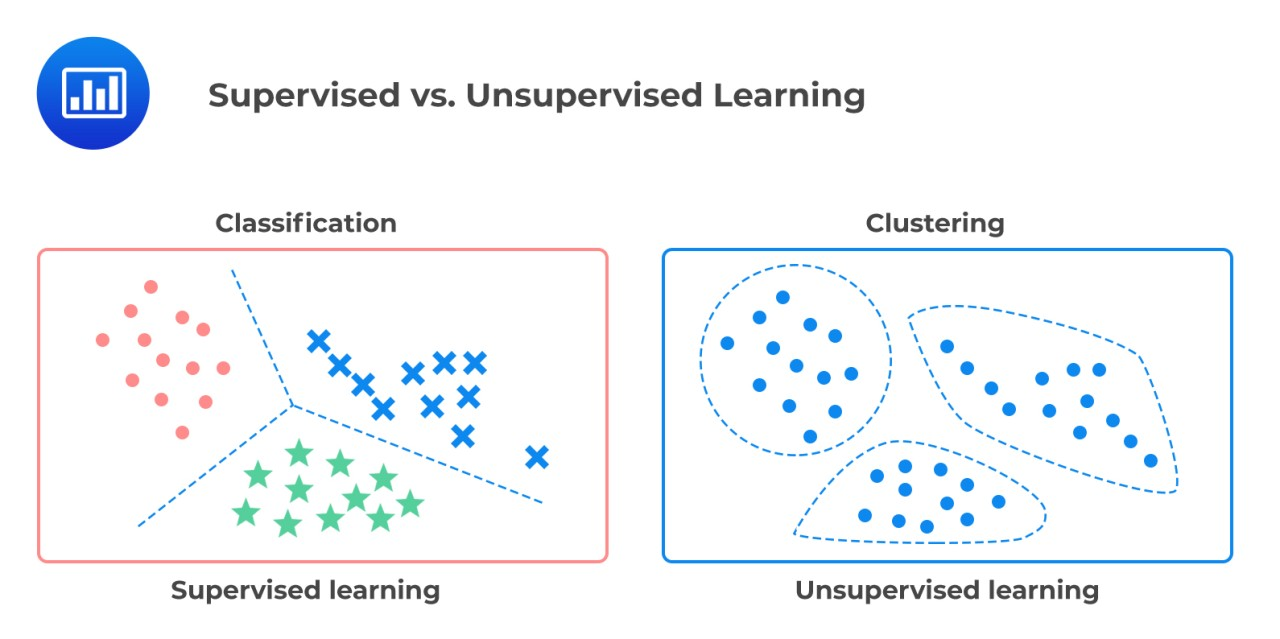

For our first example of unsupervised learning, we will implement k-means clustering!

Image source: [LinkedIn](https://www.linkedin.com/pulse/supervised-vs-unsupervised-learning-whats-difference-smriti-saini).

***

# The Algorithm:

***
In k-means clustering, we try to minimize the "in-cluster" sum of squares by minimizing the euclidian distance from the mean of the cluster (often called the centroid).

Mathematically, this looks like:

$ \sum_{i = 1}^{k} \sum_{x \in C_i} \mid \mid x - \mu_i \mid \mid^2$

Where $C_i$ is cluster $i$ for $i = 1,2,...,k$, and where x represents each data point.
***

***
Import the necessary modules.
***

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

***
Import and pre-process our data.
***

In [10]:
#Import the dataset.
soccer = pd.read_csv("soccer_stats.csv", encoding='ISO-8859-1', delimiter=';')

# Filter the data such that we are only including players who have player more than 7.5 games worth of time.
soccer = soccer[soccer['90s'] >= 15]

# Get the goals for forwards and defenders to use as a predictor.
x = soccer['Goals'].values

# Select clearances as a predictor.
y = soccer['Clr'].values

# Let's also combine them.
train = soccer[['Goals', 'Clr']].values

***
Plot the data.
***

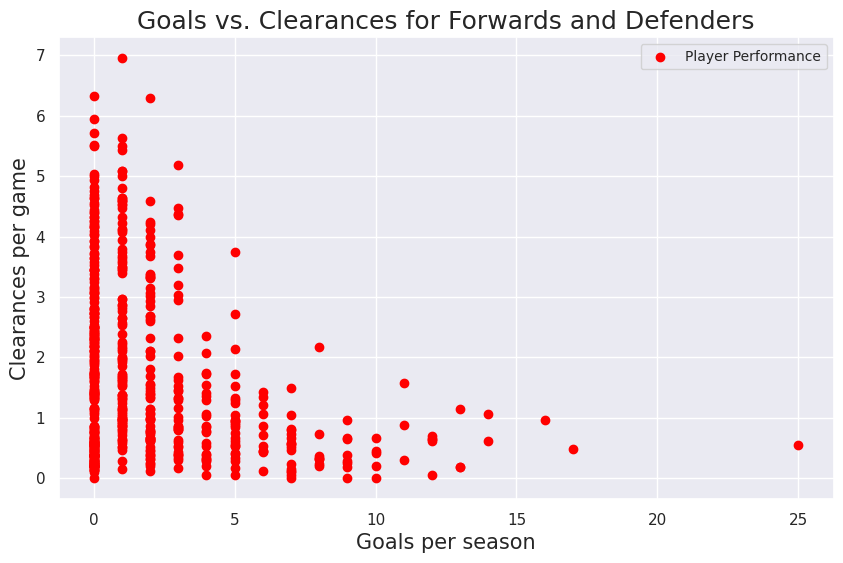

In [11]:
# Set the theme.
sns.set_theme()

# Set the figure size.
plt.figure(figsize = (10, 6))

# Add the non red card players to the plot.
plt.scatter(x, y, color = "red", label = "Player Performance")
plt.xlabel("Goals per season", fontsize = 15)
plt.ylabel("Clearances per game", fontsize = 15)
plt.legend(fontsize = 10, loc = "upper right")
plt.title("Goals vs. Clearances for Forwards and Defenders", fontsize = 18)
plt.show()

***
Implement k-means clustering.
***

In [19]:
# Fit the model.
kmeans = KMeans(n_clusters = 5, n_init = 10, random_state = 42)

# Make predictions.
labels = kmeans.fit_predict(train)

# Get cluster assignments.
labels = kmeans.labels_

# Get coordinates of cluster centers.
centers = kmeans.cluster_centers_

***
Let's plot our results.
***

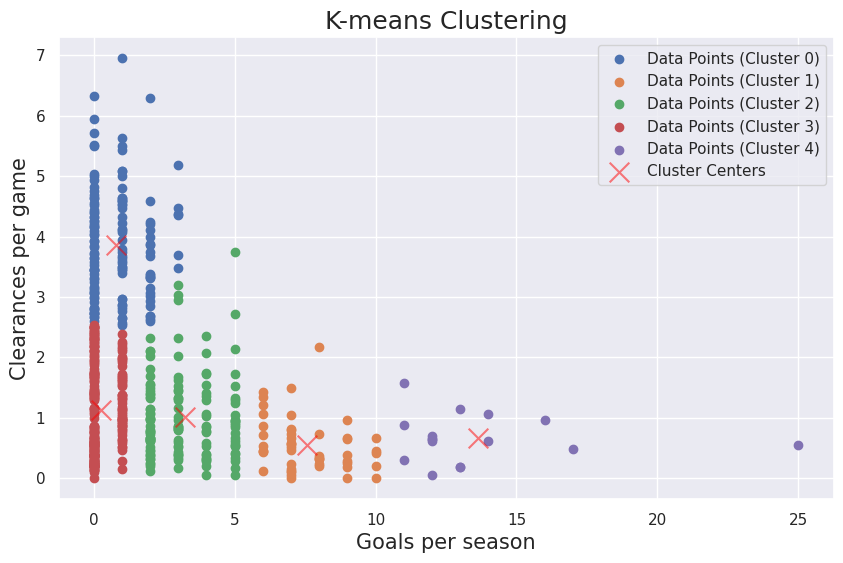

In [22]:
# Get unique labels.
unique_labels = set(labels)

# Set the figure size.
plt.figure(figsize = (10, 6))

# Plot the points with different colors for each label.
for label in unique_labels:
    plt.scatter(x[labels == label], y[labels == label], marker='o', label=f'Data Points (Cluster {label})')

# Plot the centroids.
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='x', label='Cluster Centers')

# Complete the plot.
plt.title('K-means Clustering', size = 18)
plt.xlabel('Goals per season', size = 15)
plt.ylabel('Clearances per game', size = 15)
plt.legend()
plt.show()

This seems okay. But what is the best way to do this? How can we measure that?

***
Let's use silhouette scores to identify well defined clusters (a way of measuring how close each point in one cluster is to points in the neighboring clusters).
***

In [23]:
# Get the silhouette score.
silhouette_score(train, labels)


0.485467045406146

This doesn't mean much without context, so let's work with more k values to find the best model for this data set!

***
Get the silhouette scores for many k-values.
***

In [24]:
# Get possible k-values.
# Note we start at 2 becasue silhouette scores mean nothing for one cluster.
possible_ks = range(2, 15)
s_score = []

# Iterate over k-values and fit models, identify silhouette scores.
for k in possible_ks:
    # Fit the model.
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state=42)

    # Make predictions.
    labels = kmeans.fit_predict(train)

    # Get the score.
    score = silhouette_score(train, labels)
    s_score.append(score)

print(f"The optimal s-score is {possible_ks[np.argmax(s_score)]}")

The optimal s-score is 2


***
Let's plot the scores.
***

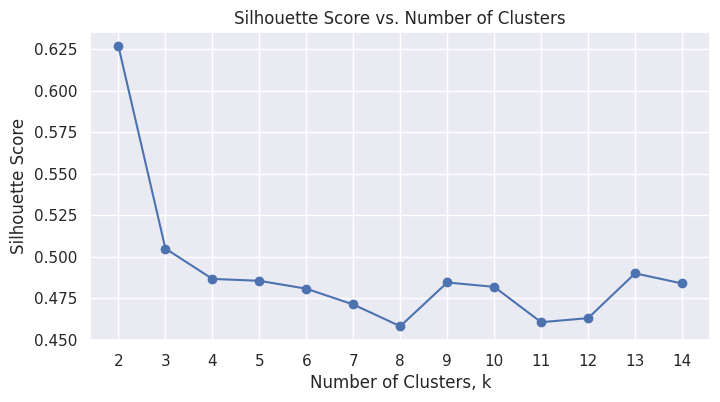

In [25]:
# Set the figure size.
plt.figure(figsize=(8, 4))

# Plot the scores by k value.
plt.plot(possible_ks, s_score, marker='o')

# Set up the rest of the plot.
plt.xlabel('Number of Clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(possible_ks)
plt.show()

We want the highest silhoutte score, so it is clear that 2 does by far the best.

***
Let's plot the optimal model for k = 2.
***

In [26]:
# Fit the model.
kmeans = KMeans(n_clusters = 2, n_init = 10, random_state = 42)

# Make predictions.
labels = kmeans.fit_predict(train)

# Get cluster assignments.
labels = kmeans.labels_

# Get coordinates of cluster centers.
centers = kmeans.cluster_centers_

***
Let's plot it!
***

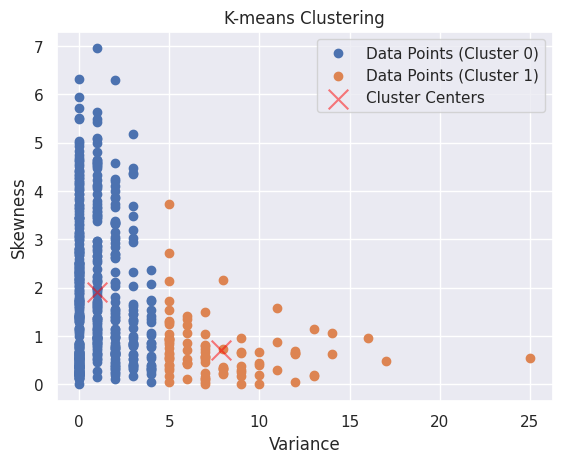

In [27]:
# Get unique labels.
unique_labels = set(labels)

# Plot the points with different colors for each label.
for label in unique_labels:
    plt.scatter(x[labels == label], y[labels == label], marker='o', label=f'Data Points (Cluster {label})')

# Plot the centroids.
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='x', label='Cluster Centers')

# Complete the plot.
plt.title('K-means Clustering')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.legend()
plt.show()

## Conclusion:

***
Here are some main takeaways from using the k-means clustering algorithm.

- Cluster Centers Identification: K-means clustering identifies
k cluster centers in the data space, each representing a prototype of the cluster.

- Data Grouping: The algorithm partitions the data into
k clusters based on the proximity of data points to the cluster centers.

- Scalability: K-means clustering is relatively scalable and computationally efficient, making it suitable for large datasets.

- Number of Clusters Selection: Choosing the optimal number of clusters (k) is a crucial step. Techniques like the elbow method, silhouette analysis, or cross-validation can help determine the appropriate value of k.

K-means clustering was a great tool to add to my repertoire. I am excited to explore more unsupervised learning algorithms next!
***